# Exploring Baltimore City 311 Requests

There are two data sets:

* [Baltimore 311](https://311services.baltimorecity.gov/) service reqeusts for the year 2019 (source: [Open Baltimore](https://data.baltimorecity.gov/City-Services/311-Customer-Service-Requests/9agw-sxsr))
* 2010 US Census population data by City Council District (source: [US Census Data](https://planning.baltimorecity.gov/sites/default/files/Demographic%20Data%20by%20Council%20District.pdf))




In [110]:
from matplotlib import pyplot
import pandas 
import seaborn 


requests = pandas.read_csv("311_Customer_Service_Requests.csv", 
                           index_col="ServiceRequestNum",
                           parse_dates=["CreatedDate", "CloseDate"],
                           infer_datetime_format=True,
                           dtype={"ZipCode": "str", "CouncilDistrict": "str"})
requests

,SRType,MethodReceived,CreatedDate,SRStatus,CloseDate,Agency,Outcome,ZipCode,Neighborhood,CouncilDistrict,Latitude,Longitude
ServiceRequestNum,,,,,,,,,,,,
19-00370157,SW-Dirty Street,Phone,2019-07-02 08:00:32,Closed,2019-07-03 13:01:27,Solid Waste,Work completed,21224,Highlandtown,1,39.288463,-76.571855
19-00369213,WW-Water Low Pressure,Phone,2019-07-01 15:37:37,Closed,2019-07-17 12:19:15,Water Wastewater,SR closed by agency-specific work management s...,21221,NaN,NaN,39.284260,-76.444584
19-00364711,TRM-Grass Mowing,API,2019-06-29 08:56:10,Closed,2019-07-16 14:57:16,Transportation,Work completed,21230,Ridgely's Delight,11,39.285555,-76.624816
19-00380006,SW-Bulk Scheduled,Phone,2019-07-05 15:36:33,Closed,2019-07-19 16:32:35,Solid Waste,NaN,21239,Perring Loch,3,39.352273,-76.584500
19-00377074,TRM-Curb Repair,Phone,2019-07-04 10:00:03,Closed (Duplicate),2019-07-09 15:47:01,Transportation,NaN,21229,Allendale,8,39.291770,-76.681235
...,...,...,...,...,...,...,...,...,...,...,...,...
19-00243068,FCCS-Refunds,Phone,2019-04-29 10:49:53,Open,NaT,Finance,NaN,21222,NaN,NaN,39.274063,-76.471778
19-00244528,TRM-Pickup Pothole,Internal,2019-04-29 15:49:02,Closed,2019-04-29 15:49:36,Transportation,Work completed,21217,Mondawmin,7,39.311093,-76.648379
19-00239333,SW-Dirty Street,Phone,2019-04-26 15:37:45,Closed,2019-06-24 11:43:41,Solid Waste,SR assessed and no cause for action determined,21230,Cherry Hill,10,39.243852,-76.632539


## What are some questions we can answer with this data?

1. What is the average number of days a request takes from being opened to being closed?
2. Which city agencies handle the most requests?
3. How does the volume of requests change over time?
4. Which city council districts handle the most requests?
5. Does the number of vacanct houses in a city council district correlate with the volume of requests?
6. Are there "request hotspots"?

_Let's get to work..._

In [111]:
seaborn.set_theme(style="darkgrid")
seaborn.set_context("talk")


# Let's add a column with the number of days the request was open. 
# We have an "open date" and a "close date". Or at least we should...
print("There are {} rows with missing close dates.".format(requests.CloseDate.isna().sum()))

# We'll create a new column here, just realizing that there will be some NaN (not-a-number) values in it.
requests = requests.assign(DaysOpen=(requests.CloseDate - requests.CreatedDate).dt.days)
requests



requests.DaysOpen.describe()

There are 10153 rows with missing close dates.


count    758395.000000
mean         20.126373
std          58.347829
min           0.000000
25%           0.000000
50%           1.000000
75%           9.000000
max         638.000000
Name: DaysOpen, dtype: float64

### Days to satisfy requests by city agency

In [112]:


# Let's aggregate some data by city agency. 
# We'll calculate a count of requests, max value, and median value for "DaysOpen" by agency
by_agency = requests.groupby(by="Agency").DaysOpen.aggregate(["count", "max", "median", "mean"]).reset_index()

by_agency

,Agency,count,max,median,mean
0,BCIT,18,85.0,8.0,23.944444
1,BGE,26473,534.0,0.0,5.897216
2,Call Center,75114,360.0,0.0,1.309556
3,City Council,0,NaN,NaN,NaN
4,Finance,25830,628.0,202.0,198.328533
5,Fire Department,4058,495.0,0.0,16.864712
6,General Services,7,64.0,32.0,33.000000
7,Health,21064,289.0,0.0,1.306400
8,Housing,79836,362.0,2.0,4.032141
9,Liquor Board,675,20.0,0.0,0.342222


_What are some issues with this data?_
How might we fix them?


[Text(0, 0.5, 'Median days open')]

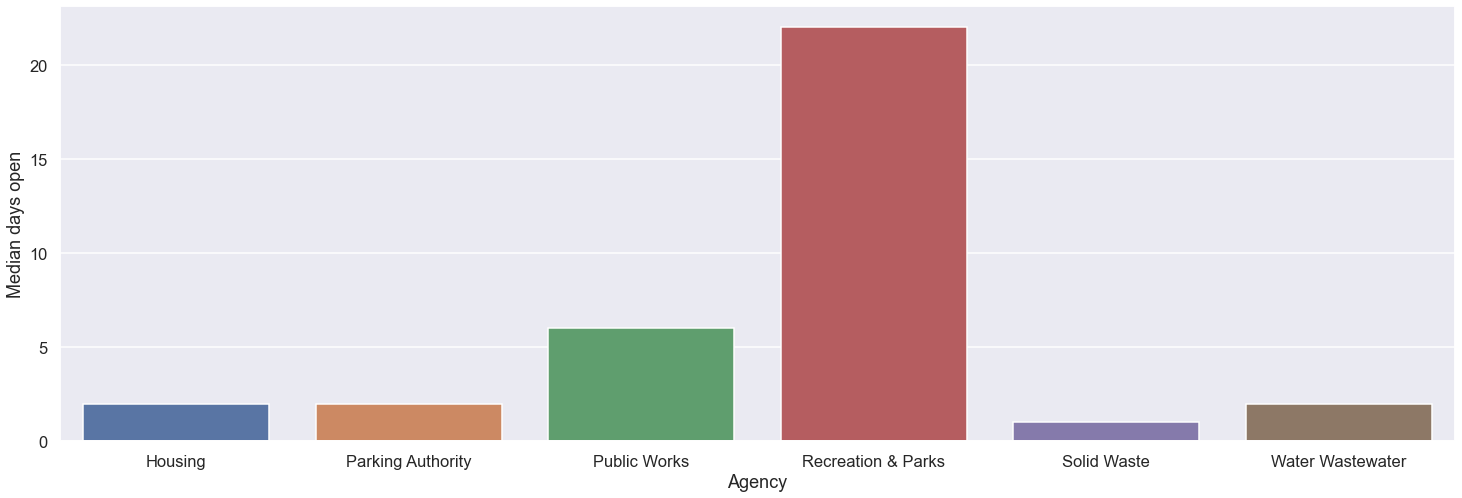

In [113]:
excluded_agencies = by_agency[(by_agency["count"]< 200) | (by_agency["median"] == 0.0) | (by_agency["median"] > 200)].Agency.to_list() 

# Used to set the size of the graphic.
fig, ax = pyplot.subplots(figsize=(25, 8))
seaborn.barplot(data=by_agency[~ by_agency.Agency.isin(excluded_agencies)], x="Agency", y="median", ax=ax)
ax.set(ylabel='Median days open')

### Timeseries Data

<AxesSubplot:xlabel='CreatedDate'>

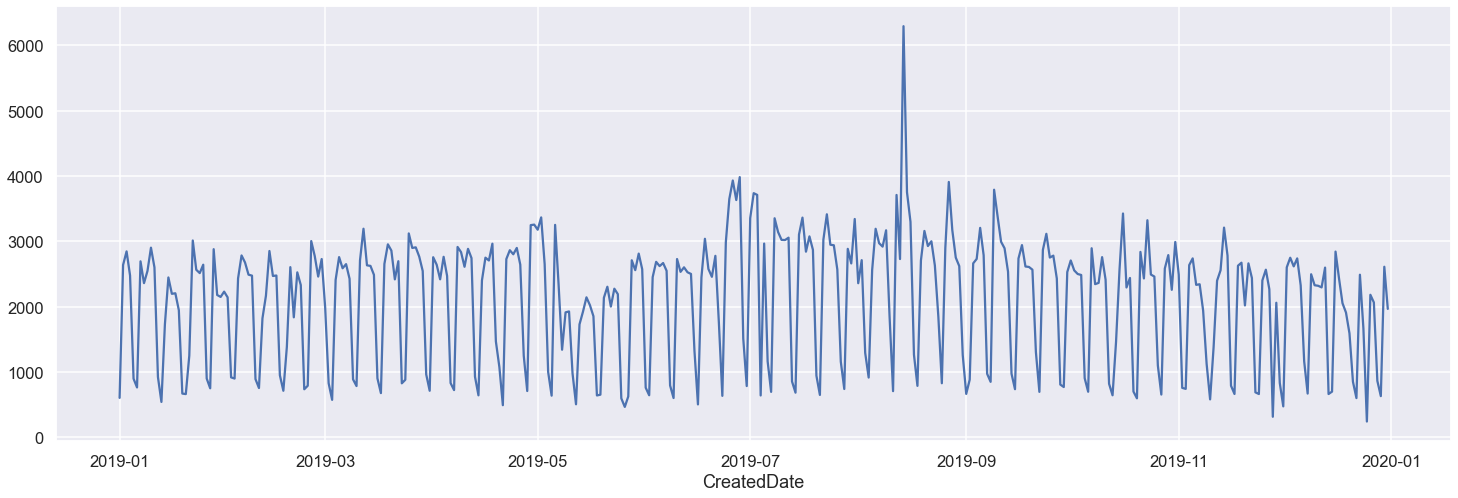

In [114]:
time_series = requests.groupby(requests.CreatedDate.dt.date).size()
fig, ax = pyplot.subplots(figsize=(25, 8))
seaborn.lineplot(data=time_series, ax=ax)

With time series data, cyclical patterns can sometimes obscure trends in the data. A simple way to "remove" a cyclical pattern (if you know the length of the cycle) is to apply a [rolling average](https://en.wikipedia.org/wiki/Moving_average)

<AxesSubplot:xlabel='CreatedDate'>

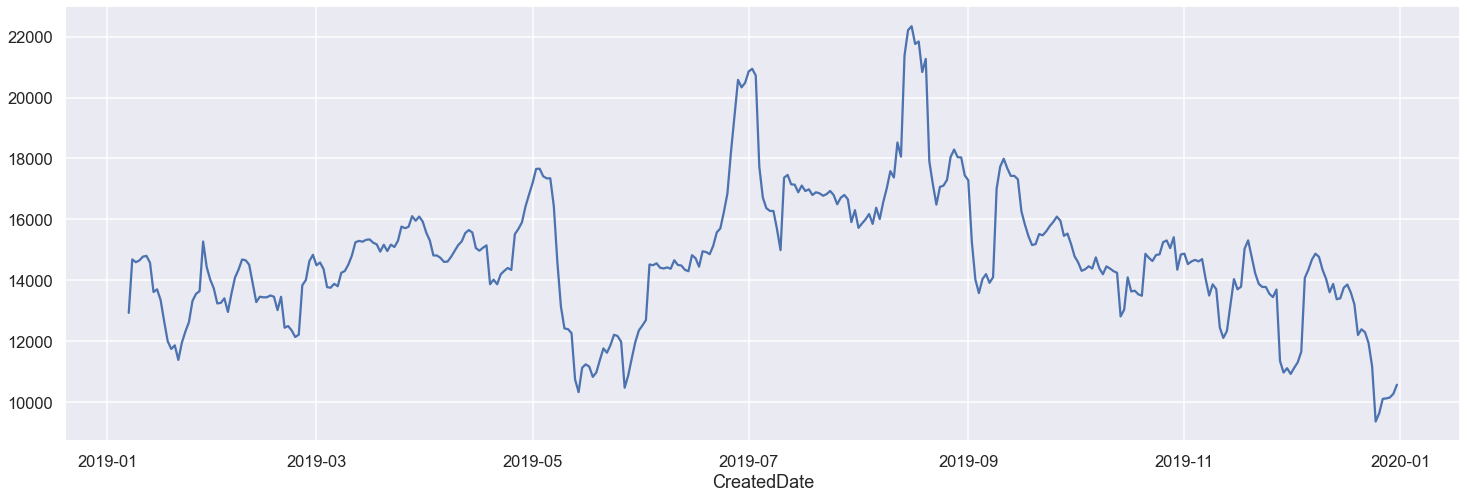

In [115]:

smoothed_time_series = time_series.rolling(7).sum()
fig, ax = pyplot.subplots(figsize=(25, 8))
seaborn.lineplot(data=smoothed_time_series, ax=ax)

### Volume of requests by district

<AxesSubplot:xlabel='CouncilDistrict', ylabel='RequestCount'>

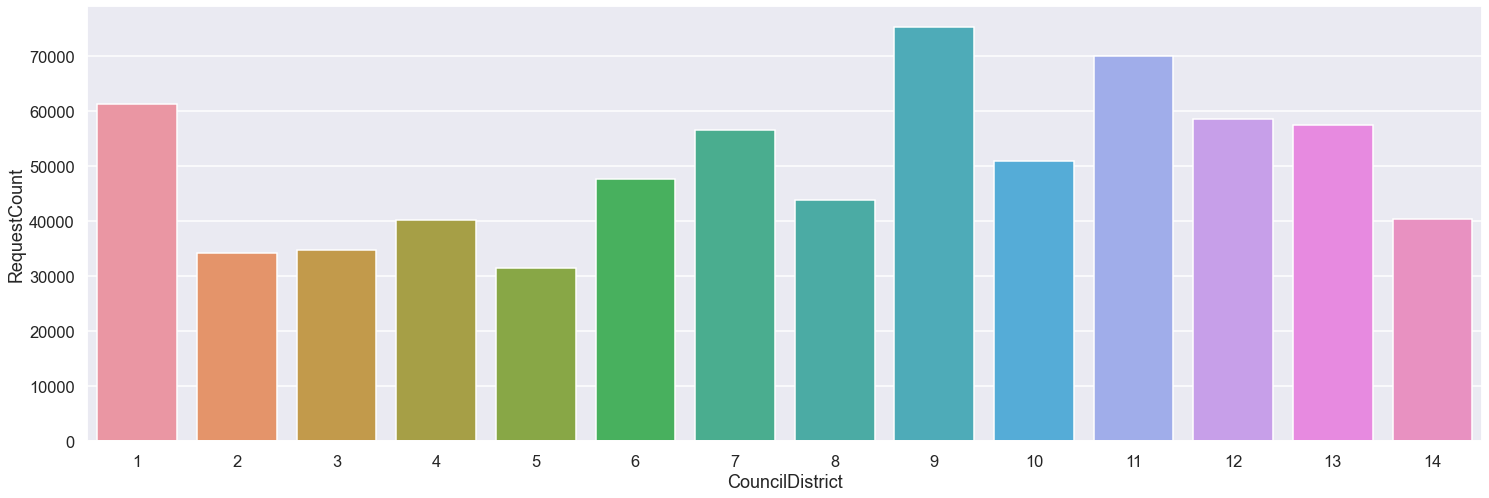

In [116]:
requests_by_district = requests.groupby(requests.CouncilDistrict).size().reset_index(name="RequestCount")

fig, ax = pyplot.subplots(figsize=(25, 8))
seaborn.barplot(data=all_districts, x="CouncilDistrict", y="RequestCount", ax=ax)

Can you see any problems with presenting the data this way?

How can we do a better job?

<AxesSubplot:xlabel='CouncilDistrict', ylabel='RequestsPerCapita'>

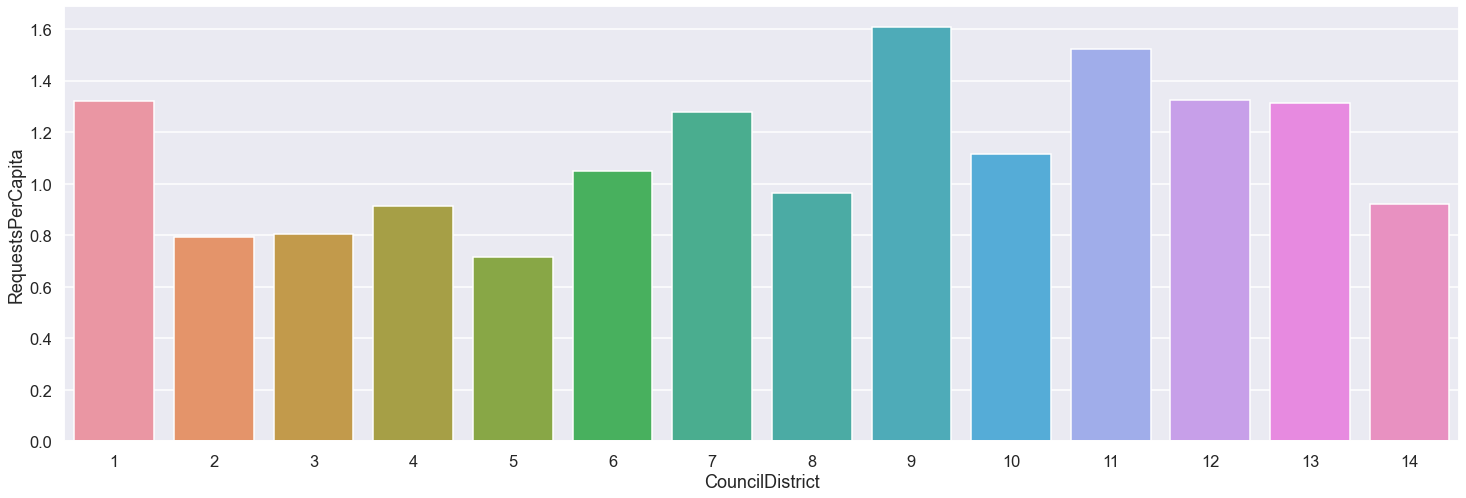

In [117]:
district_demographics = pandas.read_csv("Baltimore_Council_District_Demographics.csv", dtype={"CouncilDistrict": "str"})
requests_by_district = requests.groupby(requests.CouncilDistrict).size().reset_index(name="RequestCount")

all_districts = pandas.merge(district_demographics, requests_by_district, on="CouncilDistrict")
all_districts = all_districts.assign(RequestsPerCapita=(all_districts.RequestCount / all_districts.Population))

fig, ax = pyplot.subplots(figsize=(25, 8))
seaborn.barplot(data=all_districts, x="CouncilDistrict", y="RequestsPerCapita", ax=ax)

### Correlation between volume of requests and vacancy rate

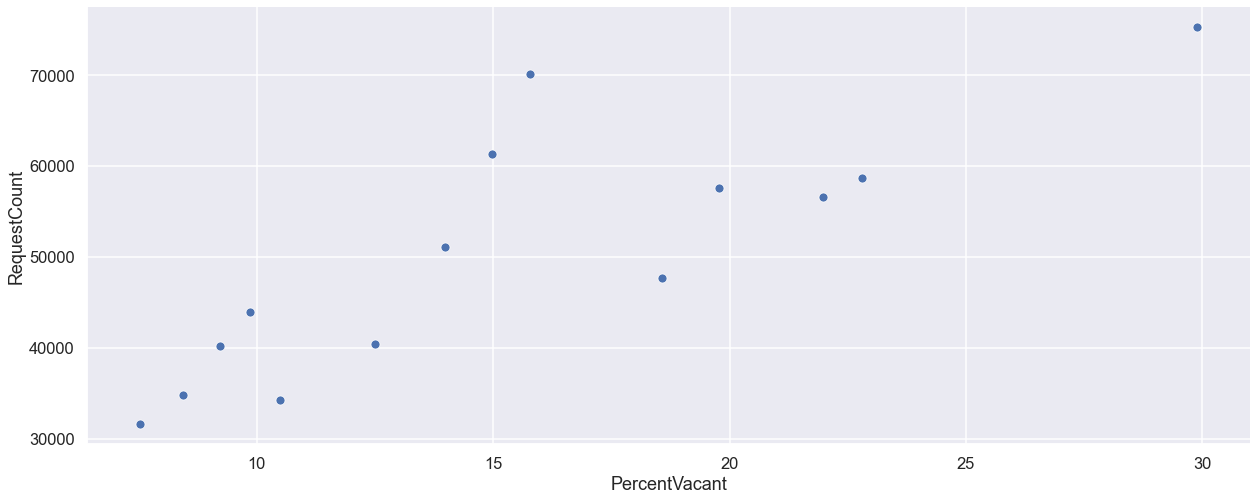

In [118]:
all_districts = all_districts.assign(PercentVacant=all_districts.VacantUnits / all_districts.HousingUnits * 100)

seaborn.relplot(x="PercentVacant", y="RequestCount", data=all_districts, height=7, aspect=2.5)

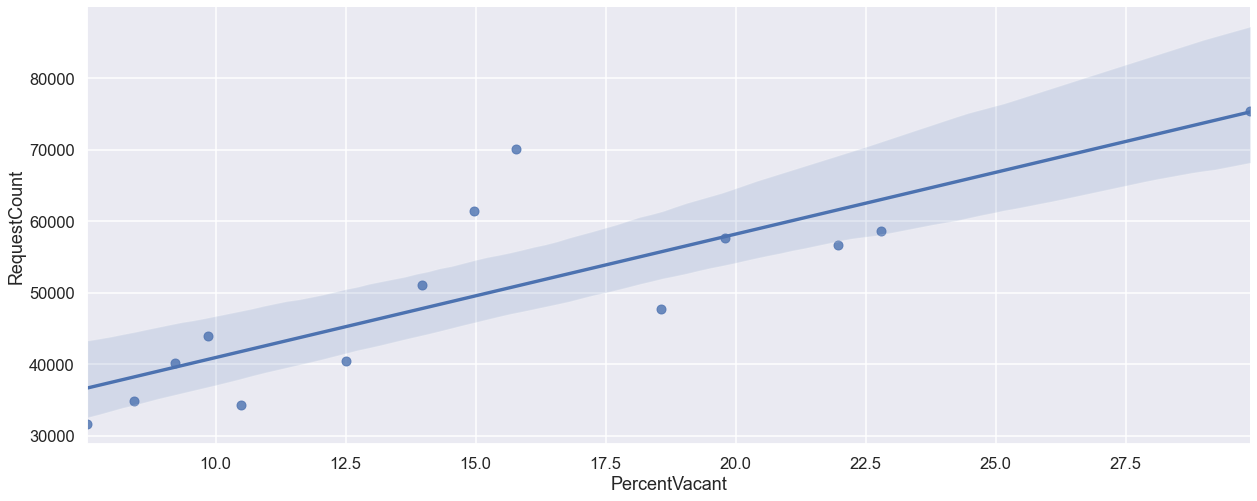

In [119]:
seaborn.lmplot(x="PercentVacant", y="RequestCount", data=all_districts, height=7, aspect=2.5)

### Finding request "hot spots"

In [120]:
import folium
from folium.plugins import HeatMap

baltimore_map = folium.Map(location=[39.28538, -76.61734], zoom_start=12)

heatmap_data = []
for index, row in requests[requests.CreatedDate.dt.month == 2].iterrows():
    if pandas.notna(row.Latitude) and pandas.notna(row.Longitude):
        heatmap_data.append((row.Latitude, row.Longitude))
    
# Plot it on the map
heatmap = HeatMap(heatmap_data, min_opacity=0.9, radius=5)
heatmap.add_to(baltimore_map)

baltimore_map
